In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

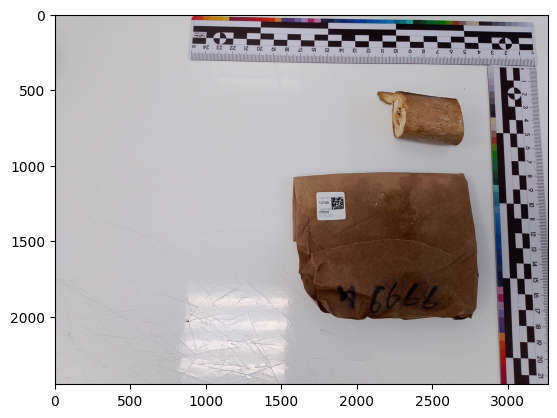

In [67]:
images = ['../Data/528.jpeg', '../Data/1084.jpg', '../Data/12146_И6125.jpg', '../Data/1753.jpeg', '../Data/12245_И6774.jpg',
          '../Data/12145_И6666.jpg', '../Data/1038.jpg','../Data/12173_И4242.jpg', '../Data/20250805_101846.jpg',
         '../Data/12156_И4559.jpg', '../Data/1038.jpg']
image = images[5]

template = './ruler_template-h.png'

img = cv2.imread(image)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

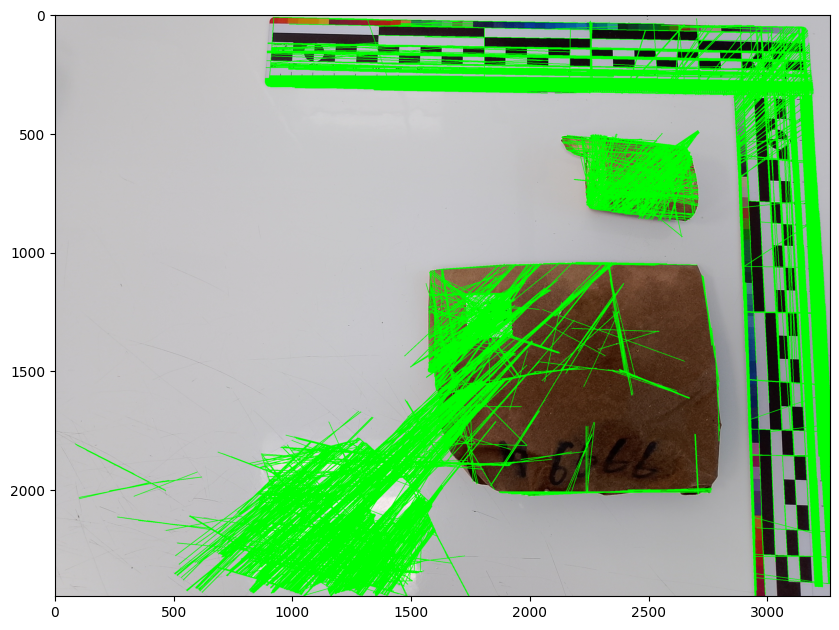

In [68]:
img = cv2.imread(image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

height = img.shape[0]
width = img.shape[1]

img1 = np.copy(img)
img2 = np.copy(img)

# Run Probabilistic Hough Line Transform
linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=height//10, maxLineGap=100) 
# Threshold=50 votes, Min line length=100, Max line gap=10

# Draw the lines on the original image
if linesP is not None:
    for line in linesP:
        x1, y1, x2, y2 = line[0]
        cv2.line(img1, (x1, y1), (x2, y2), (0, 255, 0), 2) # Draw in green

plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

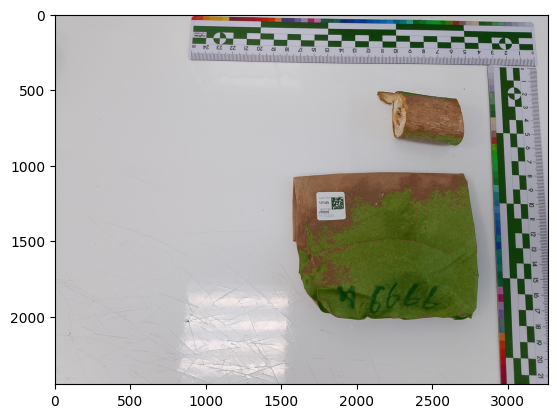

In [69]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_black = (0, 0, 0)
upper_black = (180, 255, 100)


mask = cv2.inRange(img_hsv, lower_black, upper_black)

mask = cv2.erode(mask, kernel=np.ones((3,3)), iterations=1)

masked = np.zeros_like(img)
masked[mask!=0] = np.array([0,255,0])
masked = cv2.addWeighted(img, 1, masked,0.2, 0)

plt.imshow(cv2.cvtColor(masked, cv2.COLOR_RGB2BGR))
#plt.imshow(mask)
plt.show()

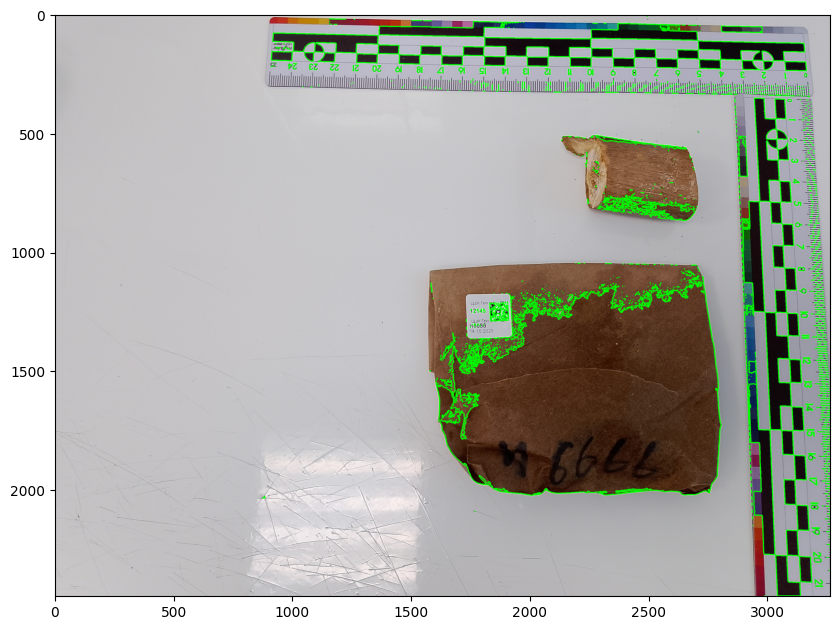

In [70]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

im2 = np.copy(img)
cv2.drawContours(im2, contours, -1, (0,255,0), 3)


plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

In [71]:
def is_rectangle(contour, epsilon_factor=0.02):
    # Approximate contour to polygon
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon_factor * peri, True)

    # Must have 4 points
    if len(approx) != 4:
        return False

    # Must be convex
    if not cv2.isContourConvex(approx):
        return False

    #Area check (avoid tiny contours)
    area = cv2.contourArea(approx)
    if area < 50:
        return False

    # Check angles ~90 degrees
    def angle(p1, p2, p3):
        v1 = p1 - p2
        v2 = p3 - p2
        cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
        return np.degrees(np.arccos(cos_angle))

    pts = approx.reshape(4, 2)
    angles = []#

    for i in range(4):
        p1 = pts[i]
        p2 = pts[(i + 1) % 4]
        p3 = pts[(i + 2) % 4]
        angles.append(angle(p1, p2, p3))

    return all(85 <= a <= 95 for a in angles)

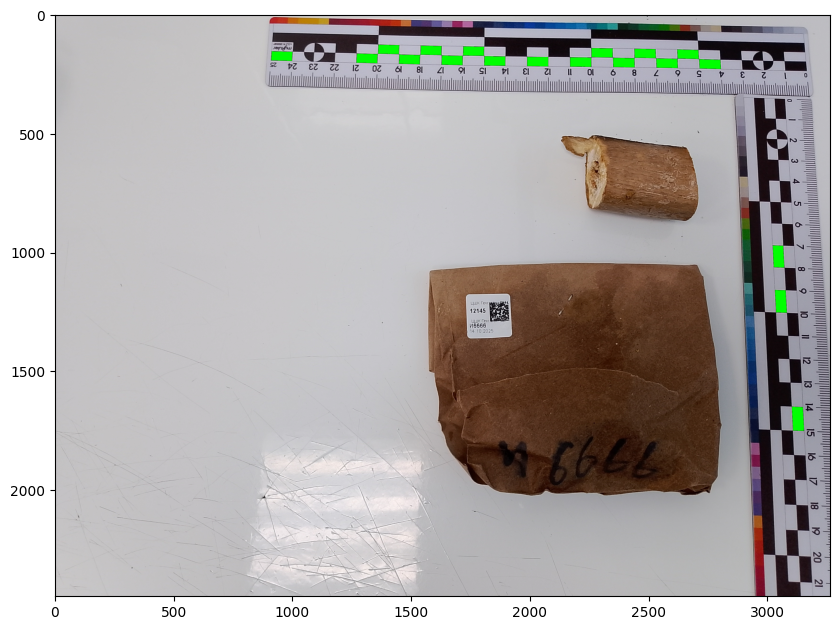

In [72]:
rectangles = []
for cnt in contours:
    if is_rectangle(cnt):
        cv2.drawContours(img2, [cnt], -1, (0, 255, 0), -1)
        rectangles.append(cv2.contourArea(cnt))


rectangles = np.array(rectangles)

plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

In [73]:
rectangles

array([4432.5, 4027. , 3841.5, 3210. , 3225.5, 3258. , 3233. , 3255. ,
       3207. , 3180. , 3155. , 3143.5, 3132.5, 3111. , 3137. , 3150.5,
       3100.5, 3094. , 3082. ])

205.48528122901917
3258.0
----
178.65685415267944
3233.0
----
213.65685415267944
3207.0
----
223.65685415267944
3180.0
----
221.89949476718903
3143.5
----
201.65685415267944
3137.0
----
217.0710676908493
3150.5
----
204.0710676908493
3100.5
----


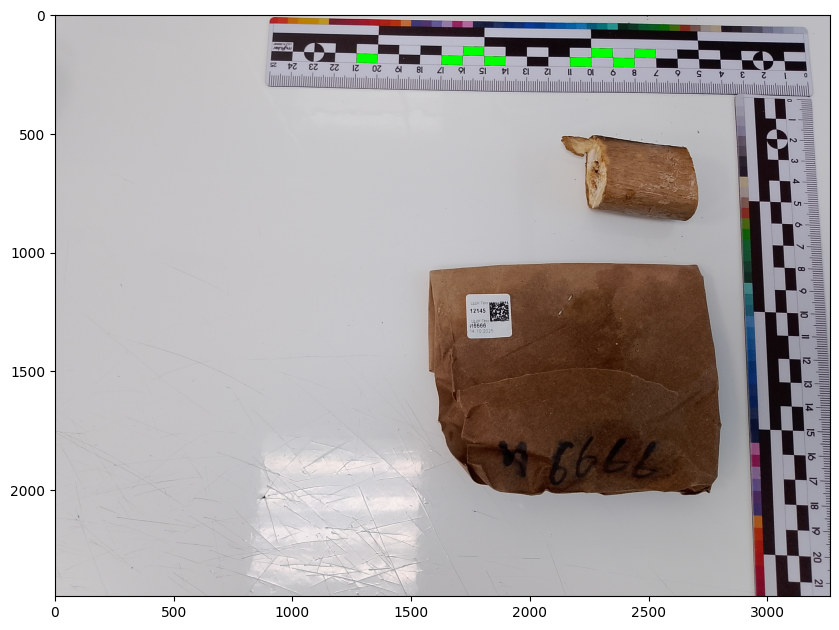

In [74]:
areas = []
per = []
img2 = np.copy(img)
for cnt in contours:
    #if is_rectangle(cnt) and (cv2.contourArea(cnt) > 2800 and cv2.contourArea(cnt) < 5000):
    if is_rectangle(cnt):
        area = cv2.contourArea(cnt)
        areas.append(area)
        p = cv2.arcLength(cnt,False)
        per.append(p)
        a = (p/2 + (p**2/4 - 4*area)**0.5)/2
        #print(a)
        if isinstance(a, complex):
            cv2.drawContours(img2, [cnt], -1, (0, 255, 0), -1)
            print(p)
            print(area)
            print("----")

per = np.array(per)
areas = np.array(areas)

plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

In [75]:
a = (per/2 + (per**2/4 - 4*areas)**0.5)/2
b = (per/2 - (per**2/4 - 4*areas)**0.5)/2
not_nan =  ~np.isnan(a)
not_nan.shape

/tmp/ipykernel_85502/4186070270.py:1: RuntimeWarning: invalid value encountered in sqrt
  a = (per/2 + (per**2/4 - 4*areas)**0.5)/2
/tmp/ipykernel_85502/4186070270.py:2: RuntimeWarning: invalid value encountered in sqrt
  b = (per/2 - (per**2/4 - 4*areas)**0.5)/2


(19,)

In [76]:
a[not_nan].mean()

80.63022956337696

In [77]:
areas[not_nan]

array([4432.5, 4027. , 3841.5, 3210. , 3225.5, 3255. , 3155. , 3132.5,
       3111. , 3094. , 3082. ])

In [78]:
areas[~not_nan]

array([3258. , 3233. , 3207. , 3180. , 3143.5, 3137. , 3150.5, 3100.5])

In [79]:
per[~not_nan].mean()

208.26929099857807

In [80]:
per[not_nan].mean()

247.0630392703143

In [81]:
(per**2/4 - 4*areas)

array([ 1668.40988089,  1844.05558602,    57.74923667,   652.41476665,
        2091.94063431, -2475.94979956, -4952.43211607,  2531.86247872,
       -1415.6871684 ,  -214.40289763,  1479.81470011,  -264.15355552,
        2320.82497154,   135.15993343, -2381.62829331,  -822.03789289,
       -1990.74983288,  2812.74846564,  2573.34556718])

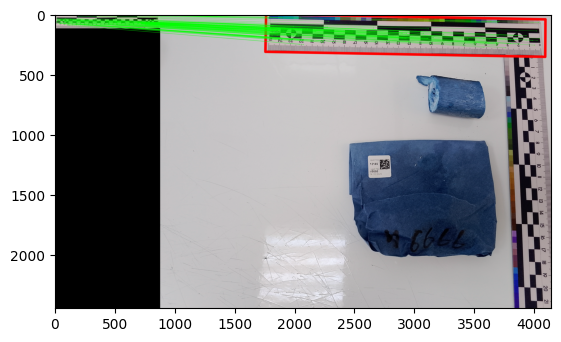

In [82]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv.imread(template, cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread(image, cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

img3 = cv.imread(template)          # queryImage
img4 = cv.imread(image) # trainImage

img4 = cv.polylines(img4,[np.int32(dst)],True,(255,0,0),20, cv.LINE_AA)

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img3,kp1,img4,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray')
plt.show()


In [83]:
def crop_minAreaRect(img, rect):
# Get center, size, and angle from rect
    center, size, theta = rect
    # Convert to int 
    center, size = tuple(map(int, center)), tuple(map(int, size))
    # Get rotation matrix for rectangle
    M = cv2.getRotationMatrix2D( center, theta, 1)
    # Perform rotation on src image
    dst = cv2.warpAffine(img, M, img.shape[:2])
    out = cv2.getRectSubPix(dst, size, center)
    return out

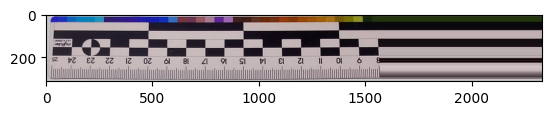

In [84]:
rect = cv2.minAreaRect(dst)


out = crop_minAreaRect(img,rect)

plt.imshow(out)

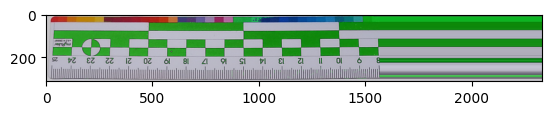

In [85]:
out_hsv = cv2.cvtColor(out, cv2.COLOR_BGR2HSV)

lower_black = (0, 0, 0)
upper_black = (180, 255, 100)


mask = cv2.inRange(out_hsv, lower_black, upper_black)

mask = cv2.erode(mask, kernel=np.ones((3,3)), iterations=1)

masked = np.zeros_like(out)
masked[mask!=0] = np.array([0,255,0])
masked = cv2.addWeighted(out, 1, masked,0.5, 0)

plt.imshow(cv2.cvtColor(masked, cv2.COLOR_RGB2BGR))
#plt.imshow(mask)
plt.show()

In [86]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(cnt))

4


In [87]:
def is_rectangle(contour, epsilon_factor=0.02):
    # Approximate contour to polygon
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon_factor * peri, True)

    # Must have 4 points
    if len(approx) != 4:
        return False

    # Must be convex
    if not cv2.isContourConvex(approx):
        return False

    #Area check (avoid tiny contours)
    area = cv2.contourArea(approx)
    if area < 50:
        return False

    # Check angles ~90 degrees
    def angle(p1, p2, p3):
        v1 = p1 - p2
        v2 = p3 - p2
        cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
        return np.degrees(np.arccos(cos_angle))

    pts = approx.reshape(4, 2)
    angles = []#

    for i in range(4):
        p1 = pts[i]
        p2 = pts[(i + 1) % 4]
        p3 = pts[(i + 2) % 4]
        angles.append(angle(p1, p2, p3))

    return all(85 <= a <= 95 for a in angles)

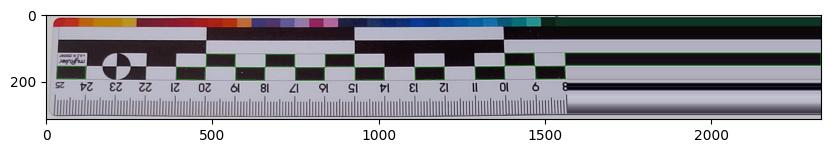

In [88]:
rectangles = []
out_copy = out.copy()
for cnt in contours:
    if is_rectangle(cnt):
        cv2.drawContours(out_copy, [cnt], 0, (0, 255, 0), 1)
        rectangles.append(cv2.contourArea(cnt))


rectangles = np.array(rectangles)

plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(out_copy, cv2.COLOR_BGR2RGB))
plt.show()

In [89]:
rectangles

array([ 3157. ,  3199.5,  3139.5,  3235.5,  3117.5,  3229. ,  3102.5,
        3248.5,  3096. ,  3096. ,  3061.5,  3134.5, 27648. ])

In [90]:
rectangles.mean()

5035.7692307692305

In [91]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(rectangles)
x = np.linspace(min(rectangles), max(rectangles), 1000)
mode = x[np.argmax(kde(x))]
print(mode)

3159.9444444444443
